<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [6]:
data['TotalSpent'] = data['TotalSpent'].replace(' ',data['MonthlySpending'].mean())

In [7]:
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data.describe(include='all')


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
count,5282.000000,5282.000000,5282.000000,5282,5282.000000,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282.000000
unique,NaN,NaN,NaN,2,NaN,2,2,2,3,3,3,3,3,3,3,3,3,2,4,NaN
top,NaN,NaN,NaN,Male,NaN,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN
freq,NaN,NaN,NaN,2655,NaN,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786,NaN
mean,32.397009,64.924754,2287.596786,NaN,0.159409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262022
std,24.550326,30.176464,2268.939228,NaN,0.366092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439776
min,0.000000,18.250000,18.800000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,9.000000,35.462500,395.725000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,29.000000,70.400000,1405.650000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,55.000000,90.050000,3795.212500,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

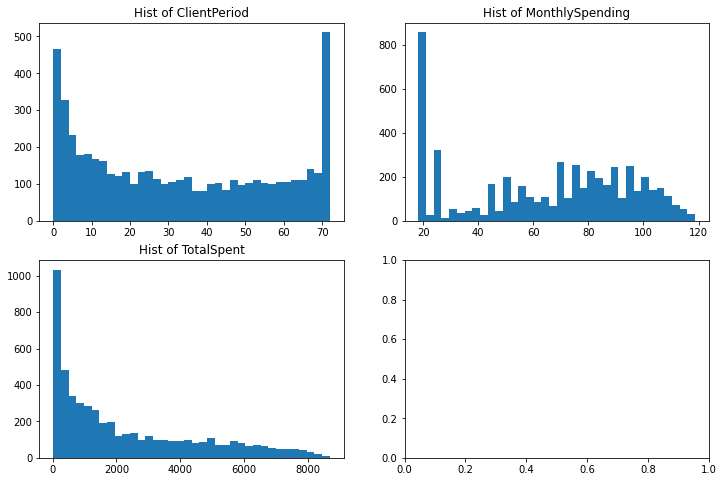

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12, 8))
ax1.hist(data["ClientPeriod"],bins=36)

ax2.hist(data["MonthlySpending"],bins=36)
ax3.hist(data["TotalSpent"],bins=36)

ax1.set_title("Hist of ClientPeriod")
ax2.set_title("Hist of MonthlySpending")
ax3.set_title("Hist of TotalSpent")
fig.show()

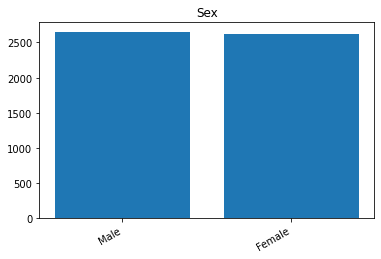

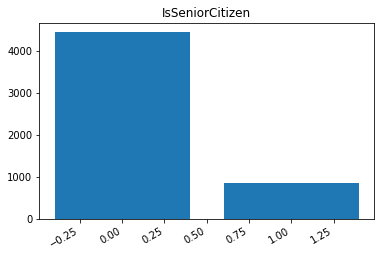

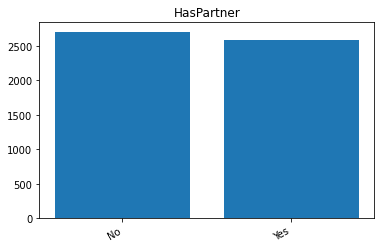

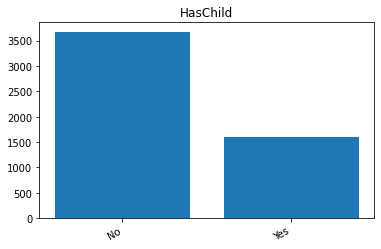

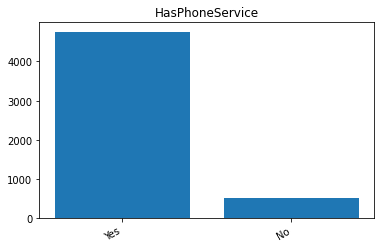

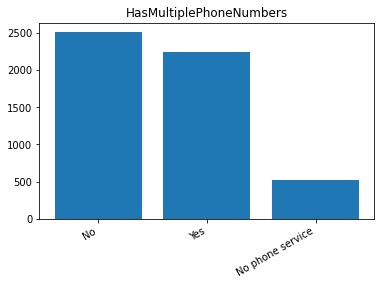

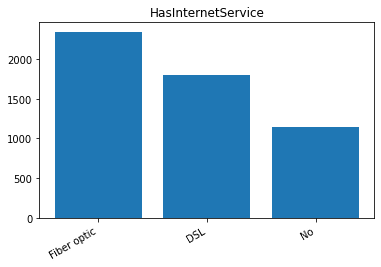

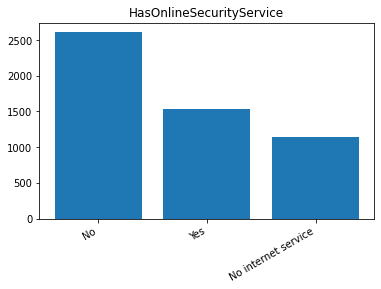

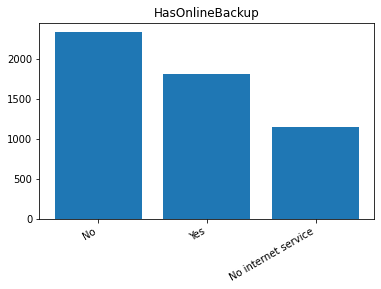

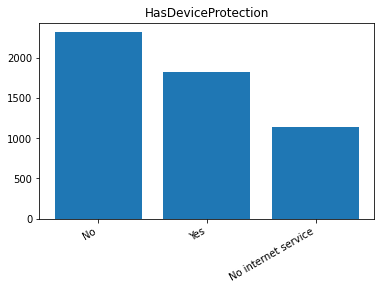

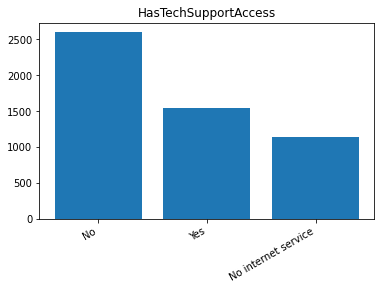

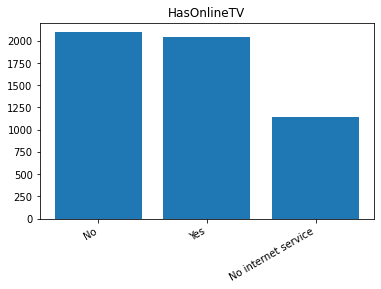

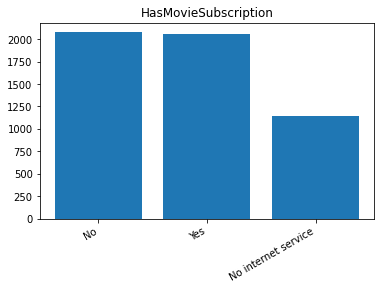

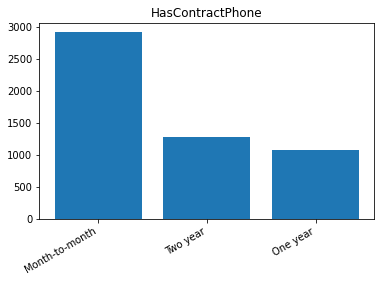

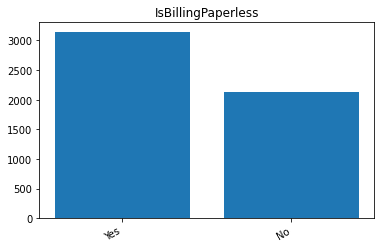

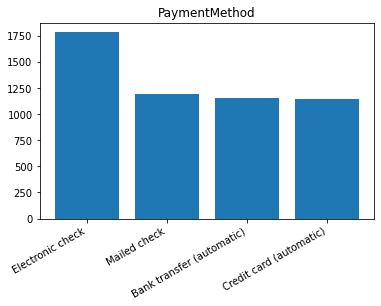

In [11]:
def plot_piechart(data,colums,isbar):
  for colum in colums:
      fig, ax = plt.subplots(figsize=(6, 4))
      unique_date = dict(data.value_counts(colum))
      count = list(unique_date.values())
      names = list(unique_date.keys())
      if (isbar):
          ax.bar(names,count)
      else:
          ax.pie(count,labels=names)
      ax.set_title(colum)
      fig.autofmt_xdate()
  plt.plot()
plot_piechart(data,cat_cols,True)

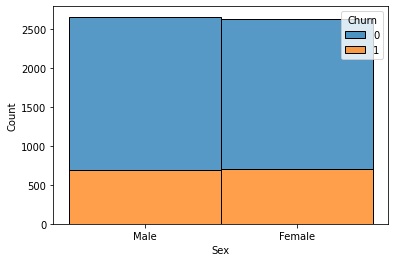

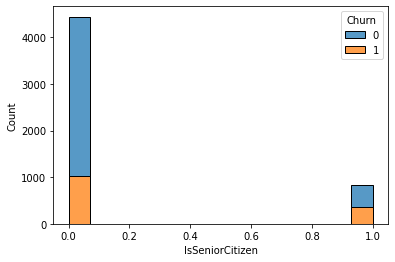

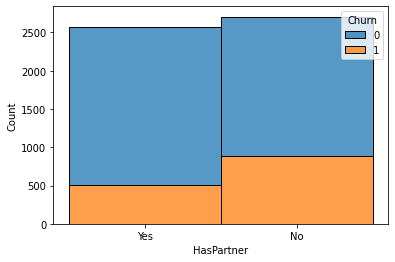

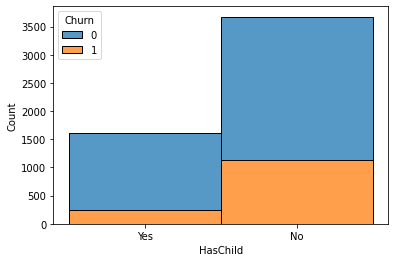

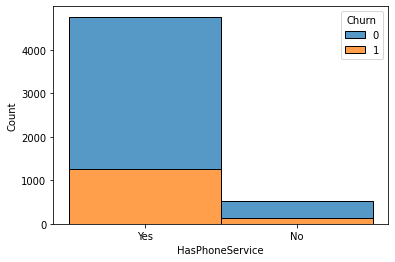

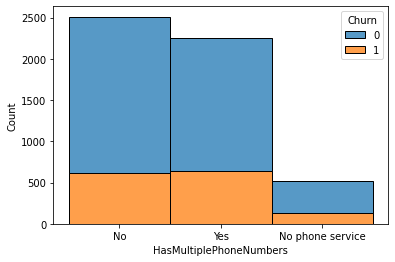

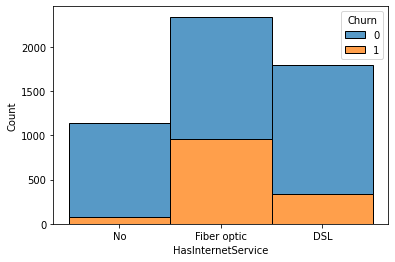

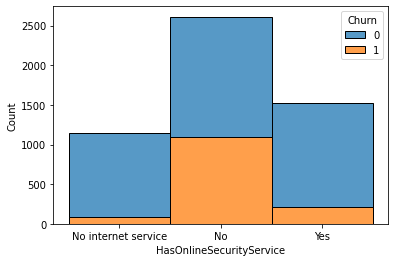

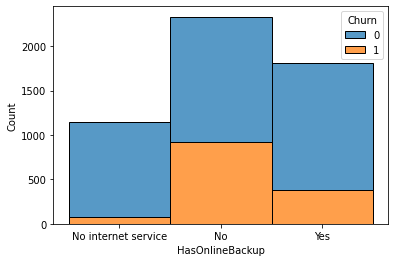

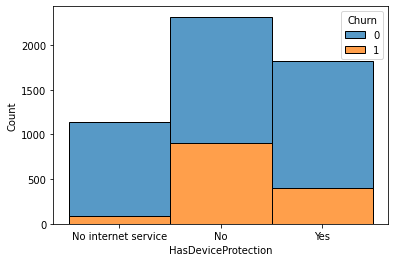

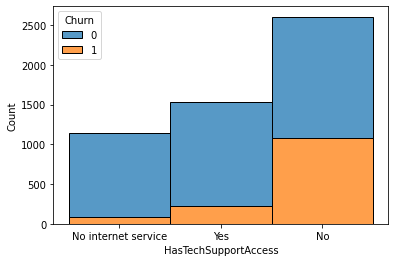

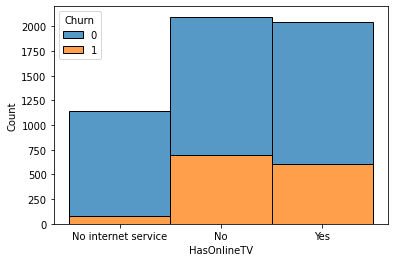

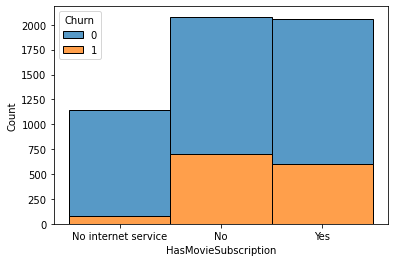

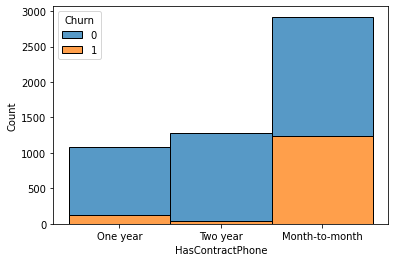

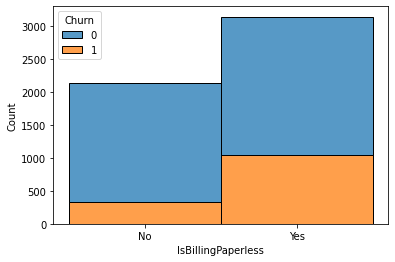

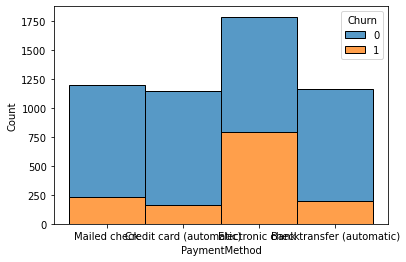

In [12]:
def plot_sns(data,colums):
    for i, colum in enumerate(colums):
        plt.figure(i)
        # sns.set_style("whitegrid")  
        sns.histplot(data=data,x=colum,hue="Churn", multiple="stack")
plot_sns(data,cat_cols)

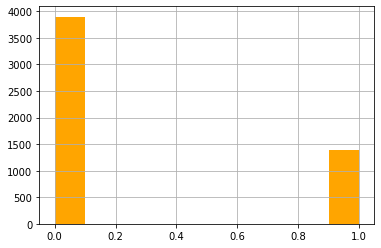

In [14]:
data['Churn'].hist(color='orange')

Призанаки являются не сбалансированными, так как пользователей которые не собираются уходить явно больше тех, которые хотять уйти

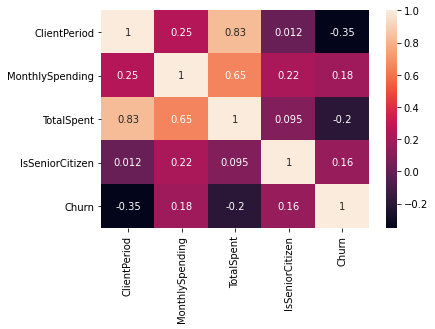

In [15]:
sns.heatmap(data.corr(),annot=True)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [18]:
features = pd.get_dummies(data[feature_cols])
True_value = data[target_col]


X_train, X_test, y_train, y_test = train_test_split(features.values,True_value.values,train_size = 0.8) 

scaler = StandardScaler() 

X_train[:,:3] = scaler.fit_transform(X_train[:,:3])
X_test[:,:3]= scaler.transform(X_test[:,:3])

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4225, 45), (4225,), (1057, 45), (1057,))

# аа

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
cv_model = GridSearchCV(estimator=DecisionTreeClassifier(), 
                        param_grid= {"max_depth": np.array(np.linspace(1, 100, 60), dtype='int')},
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs = -1)
cv_model.fit(X_train, y_train)
y_pred = cv_model.predict(X_train)
print(cv_model.best_estimator_)
print(roc_auc_score(y_train,y_pred))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.6872187719575303


# Конец

С помщью train/test

In [22]:
grid = {
    "C": np.power(10.0, np.arange(-5, 5)),
    "penalty": ['l2', 'elasticnet'],
    "solver": ["newton-cg", "lbfgs", "liblinear", 'saga']
}

In [23]:
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=50000, tol=10).fit(X_train, y_train)
print(clf.get_params())
y_pred = clf.predict(X_test)
print(roc_auc_score(y_test,y_pred))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 777, 'solver': 'lbfgs', 'tol': 10, 'verbose': 0, 'warm_start': False}
0.7389027431421447


In [24]:
import warnings
warnings.filterwarnings('ignore')
clf = LogisticRegression(random_state=42, max_iter=50000, tol=10)
cv_model = GridSearchCV(clf,grid,cv=5,scoring="roc_auc")
cv_model.fit(X_train, y_train)
print(cv_model.best_params_)
y_pred = cv_model.predict(X_train)
print(roc_auc_score(y_train,y_pred))

{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.7239885517585478


In [25]:
logregcv = LogisticRegressionCV(scoring='roc_auc',refit=True).fit(X_train, y_train)
y_pred = logregcv.predict(X_test)
print(roc_auc_score(y_test,y_pred))
logregcv.get_params

0.7396166446628527


<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)>

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
!pip install catboost
import catboost

     |████████████████████████████████| 67.3MB 43kB/s 


In [27]:
data.loc[:,feature_cols]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,feature_cols],data[target_col],train_size = 0.80) 

In [29]:
categorical_features_indices = np.where(data[feature_cols].dtypes != np.number)[0]
categorical_features_indices

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [30]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,eval_metric='AUC')
boosting_model.fit(X_train, y_train)

Learning rate set to 0.019062
0:	total: 62ms	remaining: 1m 1s
1:	total: 75.5ms	remaining: 37.7s
2:	total: 86.5ms	remaining: 28.7s
3:	total: 98ms	remaining: 24.4s
4:	total: 113ms	remaining: 22.4s
5:	total: 127ms	remaining: 21.1s
6:	total: 139ms	remaining: 19.6s
7:	total: 149ms	remaining: 18.5s
8:	total: 152ms	remaining: 16.8s
9:	total: 163ms	remaining: 16.2s
10:	total: 176ms	remaining: 15.8s
11:	total: 188ms	remaining: 15.5s
12:	total: 198ms	remaining: 15s
13:	total: 216ms	remaining: 15.2s
14:	total: 228ms	remaining: 15s
15:	total: 240ms	remaining: 14.8s
16:	total: 252ms	remaining: 14.6s
17:	total: 264ms	remaining: 14.4s
18:	total: 274ms	remaining: 14.2s
19:	total: 284ms	remaining: 13.9s
20:	total: 290ms	remaining: 13.5s
21:	total: 301ms	remaining: 13.4s
22:	total: 314ms	remaining: 13.3s
23:	total: 324ms	remaining: 13.2s
24:	total: 336ms	remaining: 13.1s
25:	total: 346ms	remaining: 12.9s
26:	total: 357ms	remaining: 12.9s
27:	total: 368ms	remaining: 12.8s
28:	total: 377ms	remaining: 12.6

In [31]:
roc_auc_score(y_train, boosting_model.predict_proba(X_train)[:, 1])

0.8949941114384798

In [32]:
roc_auc_score(y_test, boosting_model.predict_proba(X_test)[:, 1])

0.8517952913371513

In [33]:
boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols,eval_metric='AUC',iterations =1000)
parameters =  {'depth' : np.array(np.arange(1, 5, 1), dtype='int')}
randm = GridSearchCV(estimator=boosting_model, param_grid = parameters, n_jobs=-1,scoring='roc_auc')
randm.fit(X_train, y_train)

Learning rate set to 0.019062
0:	total: 7.59ms	remaining: 7.58s
1:	total: 15.9ms	remaining: 7.93s
2:	total: 23.9ms	remaining: 7.95s
3:	total: 32ms	remaining: 7.97s
4:	total: 38.8ms	remaining: 7.73s
5:	total: 44.6ms	remaining: 7.4s
6:	total: 52ms	remaining: 7.37s
7:	total: 58.1ms	remaining: 7.2s
8:	total: 63.6ms	remaining: 7s
9:	total: 70.9ms	remaining: 7.02s
10:	total: 77.7ms	remaining: 6.99s
11:	total: 84.4ms	remaining: 6.95s
12:	total: 91.3ms	remaining: 6.93s
13:	total: 98.4ms	remaining: 6.93s
14:	total: 105ms	remaining: 6.88s
15:	total: 112ms	remaining: 6.87s
16:	total: 118ms	remaining: 6.82s
17:	total: 125ms	remaining: 6.79s
18:	total: 131ms	remaining: 6.79s
19:	total: 139ms	remaining: 6.8s
20:	total: 147ms	remaining: 6.84s
21:	total: 154ms	remaining: 6.84s
22:	total: 161ms	remaining: 6.83s
23:	total: 167ms	remaining: 6.79s
24:	total: 173ms	remaining: 6.75s
25:	total: 181ms	remaining: 6.76s
26:	total: 187ms	remaining: 6.75s
27:	total: 194ms	remaining: 6.73s
28:	total: 205ms	remaini

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f1625ba13d0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': array([1, 2, 3, 4])}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='roc_auc',
             verbose=0)

In [34]:
roc_auc_score(y_train, randm.predict_proba(X_train)[:, 1])

0.8708039996809757

In [35]:
roc_auc_score(y_test, randm.predict_proba(X_test)[:, 1])

0.8547132078901917

In [46]:
print(boosting_model.get_all_params)

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7f1625ba13d0>>


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [36]:
best_model = randm

In [40]:
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'] = X_test['TotalSpent'].replace(' ',X_test['MonthlySpending'].mean())
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1] 
submission.to_csv('./my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.